# **Problem Statement**

The goal of this project is to build a **sentiment analysis model** that can automatically classify movie reviews as **positive** or **negative**.  

We use the **IMDB movie reviews dataset**, which contains thousands of labeled reviews.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA  and Data Preprocessing**

In [8]:
# Loading the dataset
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.shape

(50000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
   df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# **Exploratory Data Analysis (EDA) Summary**

The IMDB dataset contains **movie reviews** along with their **sentiment labels**. Here's a summary of the key insights:

1. **Dataset Shape**
   - Total rows: 50,000 reviews  
   - Columns: 2 (`review`, `sentiment`)

2. **Column Information**
   - `review`: Contains the text of the movie review.  
   - `sentiment`: Target variable; contains either `positive` or `negative` labels, later mapped to **1 (positive)** and **0 (negative)**.

3. **Missing Values**
   - No missing values in either `review` or `sentiment` columns. Dataset is clean.

4. **Sentiment Distribution**
   - The dataset is **balanced** with roughly equal numbers of positive and negative reviews.

   ```python
   df['sentiment'].value_counts()


# **Data Preprocessing**



- Remove HTML tags  
- Convert text to lowercase  
- Remove special characters  
- Remove stopwords  
- Apply stemming


In [12]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0}).astype(int)
df.head()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**1- Removing HTML tags from text(Reviews)**

In [13]:
import re

In [14]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean,"", text)


In [15]:
df['review'] = df['review'].apply(clean_html)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**2- Convert(reviews) text in lower Case**

In [16]:
def lower_case(text):
    return text.lower()

In [17]:
df['review'] = df['review'].apply(lower_case)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


**3- Remove Special Characters**

In [18]:
def remove_special(text):
    x = ''

    for i in text:
        if i.isalnum():
            x = x + i
        else:
            x = x + ' '

    return x

In [19]:
df['review'] = df['review'].apply(remove_special)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


**4- Remove Stopwords**


In [20]:
import nltk

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=False, force=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
stopwords.words('english')  

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
def remove_stopwords(text):
    x = []
    
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    
    y = x[:]
    x.clear()
    return y

In [24]:
df['review'] = df['review'].apply(remove_stopwords)

In [25]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1


**5- Stemming**

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
y = []
def stemming(text):
    for i in text:
        y.append(ps.stem(i))

    z = y[:]
    y.clear()
    return z

In [28]:
df['review'] = df['review'].apply(stemming)

**Joining Words After Cleaning**

In [29]:
def join_back(list_input):
    return ' '.join(list_input)

In [30]:
df['review'] = df['review'].apply(join_back)

# **Text Encoding with CountVectorizer**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['review']).toarray()

In [32]:
X.shape

(50000, 5000)

In [33]:
X[0].max()

np.int64(6)

In [34]:
y=df.iloc[:,-1].values

In [35]:
y.shape

(50000,)

# **Model Training**

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [37]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

In [40]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [42]:
mnb.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [43]:
bnb.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


# **Evaluation**

In [44]:
# Predictions
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

In [46]:

# Evaluation
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred2))
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred3))

GaussianNB Accuracy: 0.7132
MultinomialNB Accuracy: 0.8428
BernoulliNB Accuracy: 0.8436


**Checking for overfitting and underfitting**

In [ ]:
# Accuracy for BernoulliNB model
train_acc = bnb.score(X_train, y_train)
test_acc  = bnb.score(X_test, y_test)

print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy :", round(test_acc * 100, 2), "%")

Train Accuracy: 85.46 %
Test Accuracy : 84.36 %


In [50]:
# Accuracy for GaussianNB model
train_acc = gnb.score(X_train, y_train)
test_acc  = gnb.score(X_test, y_test)

print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy :", round(test_acc * 100, 2), "%")

Train Accuracy: 74.14 %
Test Accuracy : 71.32 %


In [52]:
# Accuracy for MultinomialNB model
train_acc = mnb.score(X_train, y_train)
test_acc  = mnb.score(X_test, y_test)

print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy :", round(test_acc * 100, 2), "%")

Train Accuracy: 85.2 %
Test Accuracy : 84.28 %


# **Visualzing the results**

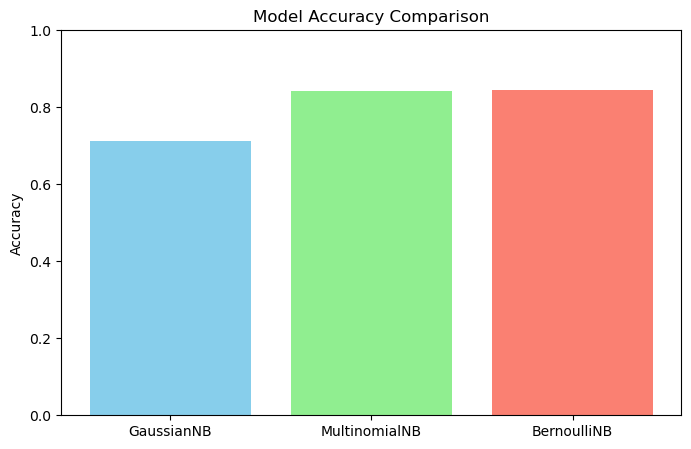

In [47]:
import matplotlib.pyplot as plt

models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracy = [accuracy_score(y_test, y_pred1), 
            accuracy_score(y_test, y_pred2), 
            accuracy_score(y_test, y_pred3)]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color=['skyblue','lightgreen','salmon'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


**Result Summary**

From the accuracy comparison, **MultinomialNB** achieved the highest accuracy.  
Hence, it is selected as the best model and saved for future predictions.


# **Saving the model**

In [48]:
import joblib
joblib.dump(mnb, 'sentiment_model.pkl')
joblib.dump(cv, 'countvectorizer.joblib')

['countvectorizer.joblib']

# **Conclusion**

In this project, we built a **sentiment analysis model** to classify IMDB movie reviews as positive or negative.  

**Key Points:**
- The dataset contained **50,000 reviews** and was **balanced** between positive and negative sentiments.
- Text preprocessing included **HTML removal, lowercasing, special character removal, stopwords removal, and stemming**.
- Features were extracted using **CountVectorizer** with a maximum of 5000 features.
- We trained three **Naive Bayes classifiers**: GaussianNB, MultinomialNB, and BernoulliNB.

**Results:**
- GaussianNB Accuracy: 71.63%  
- MultinomialNB Accuracy: 84.28%  
- BernoulliNB Accuracy: 84.38%  

**Conclusion:**  
Both MultinomialNB and BernoulliNB performed very well, with BernoulliNB slightly ahead.  
We selected **MultinomialNB** as the final model because of its proven efficiency with text data and saved it for future predictions.  

The model can now accurately predict the sentiment of any new movie review input, making it useful for applications like review analysis or opinion mining.
